<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_9/Passengers_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn

In [2]:
t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
num_passengers = len(t)

print("Number of Passengers:", num_passengers)

Number of Passengers: 891


In [4]:
distinct_who_column = t['who'].nunique()
print("Distinct Values in 'who' column:", distinct_who_column)

Distinct Values in 'who' column: 3


In [5]:
missing_values = t.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
passengers_over_60 = t[t['age'] > 60]
num_passengers_over_60 = len(passengers_over_60)
print("Passengers Over 60:", num_passengers_over_60)


Passengers Over 60: 22


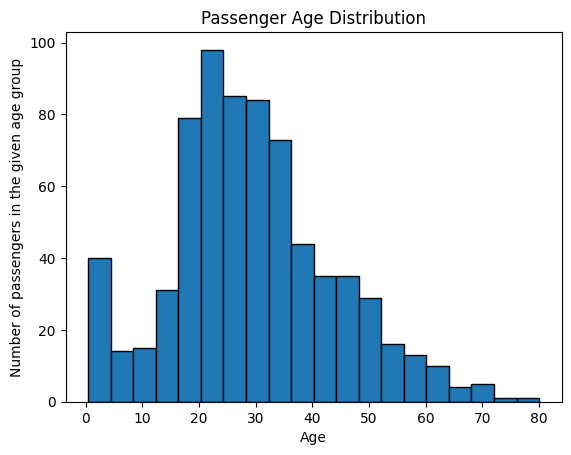

In [20]:
import matplotlib.pyplot as plt

t['age'].plot.hist(bins=20,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of passengers in the given age group')
plt.title('Passenger Age Distribution')
plt.show()

In [8]:
quantiles = t['age'].quantile([0.25, 0.5, 0.75])
print(quantiles)

0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64


In [9]:
t.dropna(subset=['embarked'], inplace=True)


In [10]:
average_fare = t['fare'].mean()
min_fare = t['fare'].min()
max_fare = t['fare'].max()
print("Minimum Fare:", min_fare)
print("Maximum Fare:", max_fare)

Minimum Fare: 0.0
Maximum Fare: 512.3292


In [11]:
class_proportions = t['pclass'].value_counts(normalize=True)
print("Proportions of Passengers in Different Classes:\n", class_proportions)

Proportions of Passengers in Different Classes:
 3    0.552306
1    0.240720
2    0.206974
Name: pclass, dtype: float64


In [12]:
gender_class_ratio = t.groupby(['pclass', 'sex']).size() / t.groupby('pclass').size()
print(gender_class_ratio)

pclass  sex   
1       female    0.429907
        male      0.570093
2       female    0.413043
        male      0.586957
3       female    0.293279
        male      0.706721
dtype: float64


In [13]:
survival_fraction = t['survived'].mean()
print(survival_fraction)

0.38245219347581555


In [14]:
survival_by_gender = t.groupby('sex')['survived'].mean()
print(survival_by_gender)

sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [15]:
survival_by_class = t.groupby('pclass')['survived'].mean()
print(survival_by_class)

pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [16]:
survival_table = t.pivot_table(index='pclass', columns='sex', values='survived', aggfunc='mean')
print(survival_table)

sex       female      male
pclass                    
1       0.967391  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [21]:
table_gender_cabin = t.groupby(['sex', 'deck'])[['survived', 'fare']].agg({'survived': 'sum', 'fare': 'mean'})
print(table_gender_cabin)


             survived        fare
sex    deck                      
female A            1   39.600000
       B           25  118.667332
       C           24  117.226541
       D           18   60.776628
       E           14   56.414167
       F            5   19.071660
       G            2   13.581250
male   A            6   39.625593
       B            8  110.404380
       C           11   85.744141
       D            7   53.006113
       E           10   36.861276
       F            3   18.462500
       G            0         NaN
